In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\shiva_l99fyzx\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",encoding='unicode_escape')

## DATA PREPROCESSING

In [3]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
data.drop(['Status','unnamed1'],axis=1,inplace=True) # since these two are null columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
data.shape

(11251, 13)

In [8]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
#dropping the null values from the data
data.dropna(inplace=True)
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## EDA

## Gender Distribution

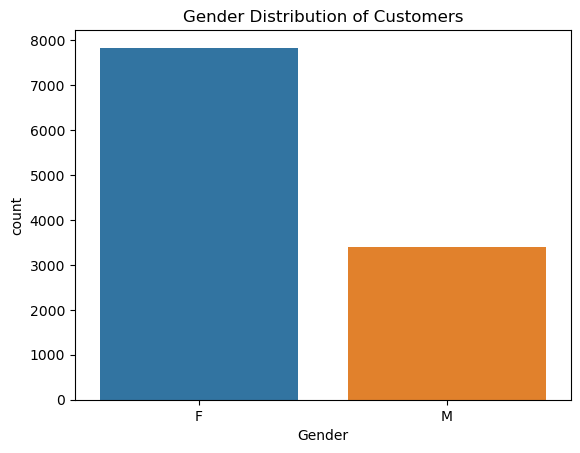

In [12]:
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution of Customers")
plt.show()

The chart indicates that there are more female shoppers than male shoppers during the Diwali sales.

# Age Group Distribution

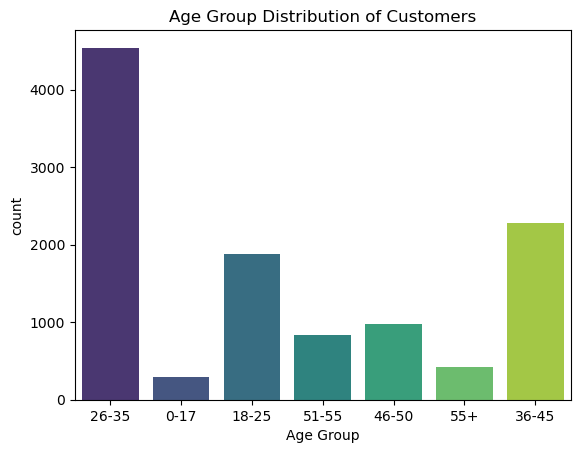

In [13]:
sns.countplot(x='Age Group', data=data, palette='viridis')
plt.title("Age Group Distribution of Customers")
plt.show()


The chart shows that the 26-35 age group was the most active during the Diwali sales, followed closely by the 18-25 and 36-45 age groups.

# Marital Status

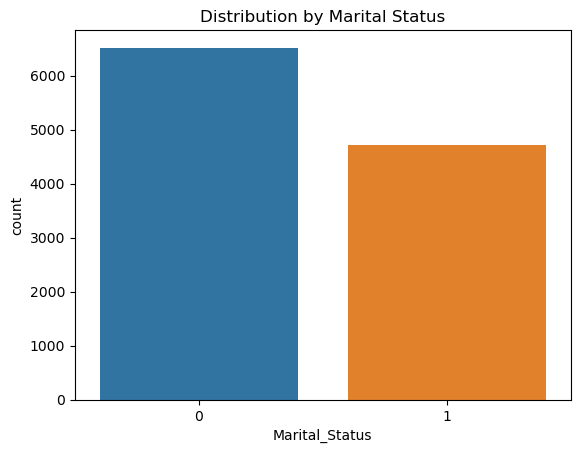

In [14]:
sns.countplot(x='Marital_Status', data=data)
plt.title("Distribution by Marital Status")
plt.show()

The chart shows that most of the customers who shopped during Diwali were married.

# Purchase Behavior Analysis
# Amount by Age Group & Amount by Age Gender

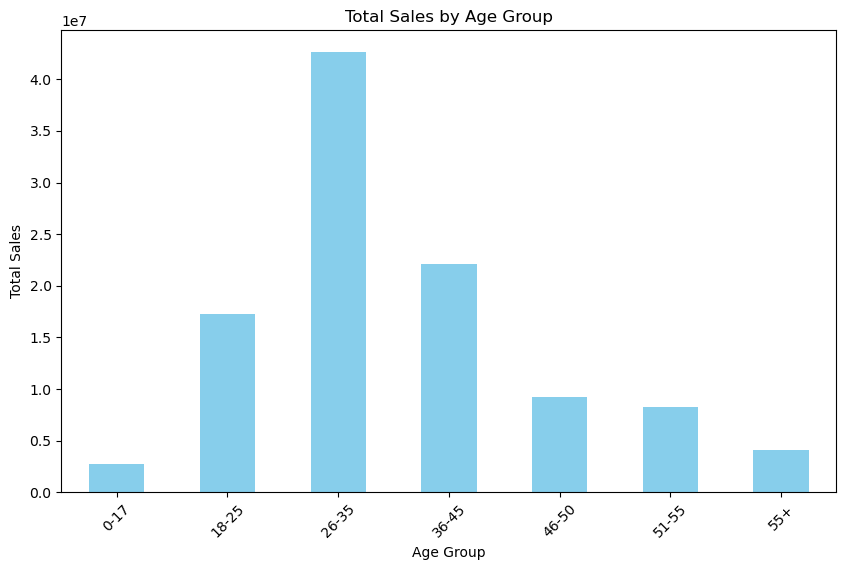

In [15]:
sales_by_age_group = data.groupby('Age Group')['Amount'].sum()
plt.figure(figsize=(10, 6))
sales_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


The chart shows that the 26-35 age group was the biggest spender during the Diwali sales, followed by the 18-25 and 36-45 age groups.

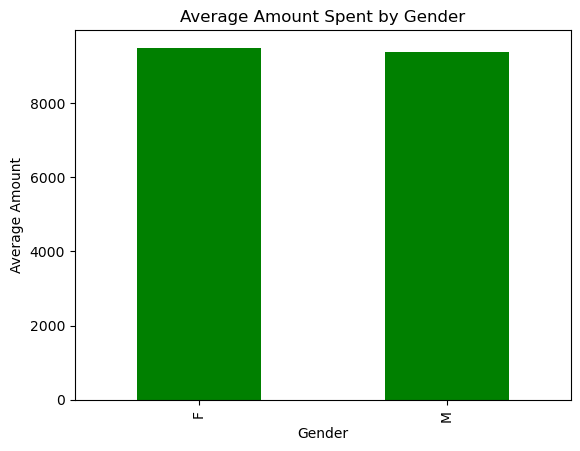

In [16]:
gender_amount = data.groupby('Gender')['Amount'].mean()
gender_amount.plot(kind='bar', title="Average Amount Spent by Gender",color='green')
plt.ylabel("Average Amount")
plt.show()

On average, both male and female shoppers spent nearly the same amount during the Diwali sales.

# Geographic Analysis
# Sales by Zone & Sales by State

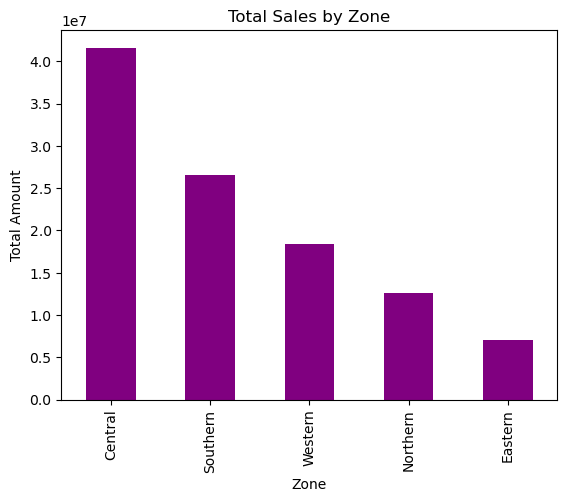

In [17]:
zone_sales = data.groupby('Zone')['Amount'].sum().sort_values(ascending=False)
zone_sales.plot(kind='bar', title="Total Sales by Zone",color='purple')
plt.ylabel("Total Amount")
plt.show()

The Central zone generated the highest sales during the Diwali season, followed by the Southern and Western zones.

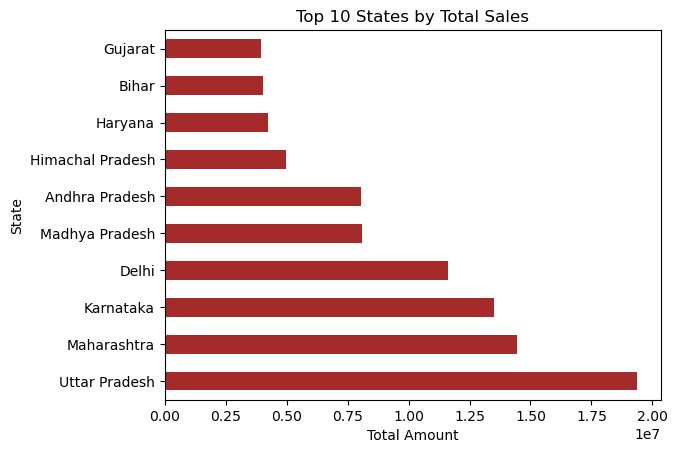

In [18]:
state_sales = data.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='barh', title="Top 10 States by Total Sales",color='brown')
plt.xlabel("Total Amount")
plt.show()

Uttar Pradesh, Maharashtra, and Karnataka were the top three states in terms of total sales during the Diwali season.

# Product Analysis
# Top Product Categories & Average Amount Spent per Product Category:

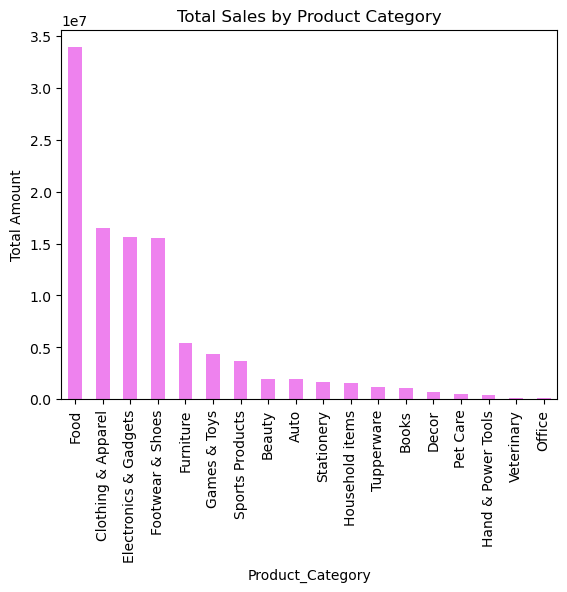

In [19]:
category_sales = data.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title="Total Sales by Product Category",color='violet')
plt.ylabel("Total Amount")
plt.show()

Food, Clothing & Apparel, and Electronics & Gadgets were the top-selling product categories during the Diwali season.

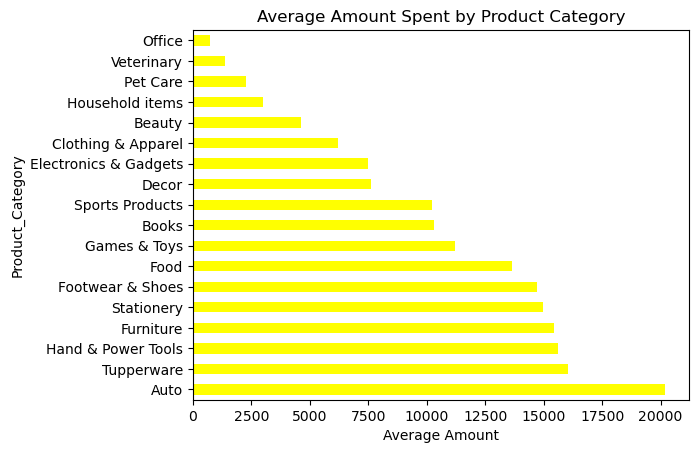

In [20]:
avg_category_amount = data.groupby('Product_Category')['Amount'].mean().sort_values(ascending=False)
avg_category_amount.plot(kind='barh', title="Average Amount Spent by Product Category",color='yellow')
plt.xlabel("Average Amount")
plt.show()

Customers were more likely to spend on big-ticket items like cars and power tools than on smaller items.

# Occupation Analysis
# Sales by Occupation

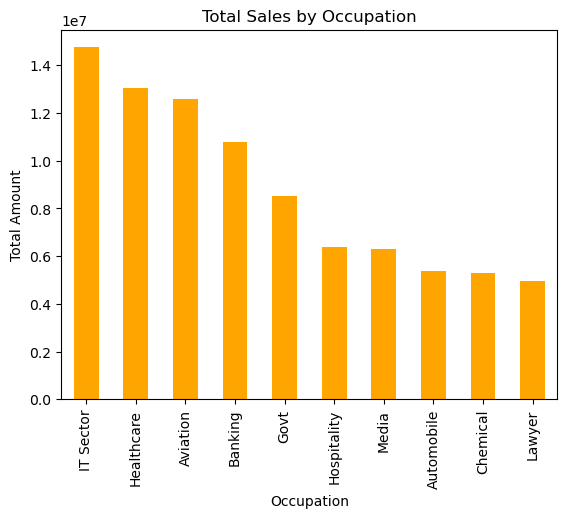

In [25]:
occupation_sales = data.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).head(10)
occupation_sales.plot(kind='bar', title="Total Sales by Occupation",color='Orange')
plt.ylabel("Total Amount")
plt.show()

The IT sector, Healthcare, and Aviation sectors were the top spenders during the Diwali sales.

# Purchase Frequency and Order Analysis
# Orders by Product Category & Average Orders per Customer

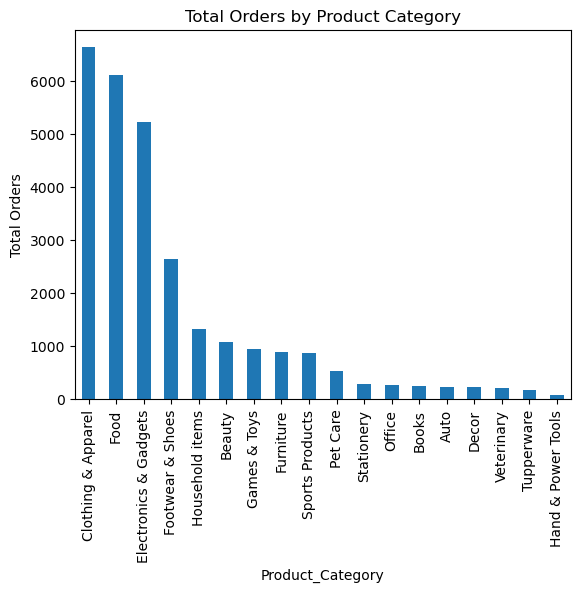

In [22]:
category_orders = data.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False)
category_orders.plot(kind='bar', title="Total Orders by Product Category")
plt.ylabel("Total Orders")
plt.show()

Clothing & Apparel, Food, and Electronics & Gadgets were the most frequently ordered product categories during the Diwali sales

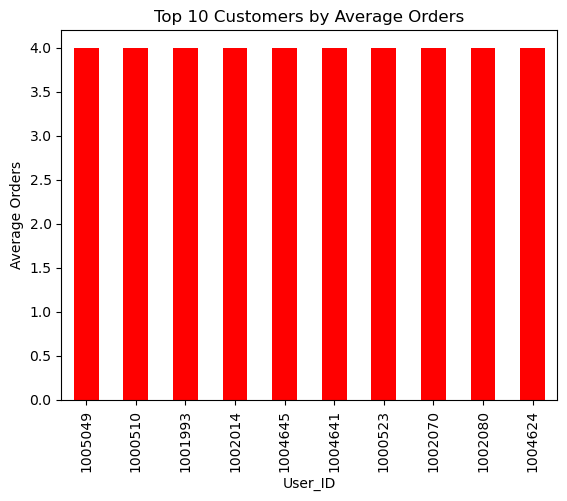

In [23]:
avg_orders = data.groupby('User_ID')['Orders'].mean().sort_values(ascending=False).head(10)
avg_orders.plot(kind='bar', title="Top 10 Customers by Average Orders",color='red')
plt.ylabel("Average Orders")
plt.show()

The chart shows that the top 10 customers placed orders consistently throughout the Diwali season.

# The Diwali sales were a hit, especially among young adults aged 26-35. Women were more likely to shop than men, and married couples were the primary shoppers. Central India and states like Uttar Pradesh, Maharashtra, and Karnataka were the top performers.

# To optimize future sales, businesses should focus on the 26-35 age group, offer relevant products, and consider regional preferences.